In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.models import load_model

Matplotlib is building the font cache; this may take a moment.


In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


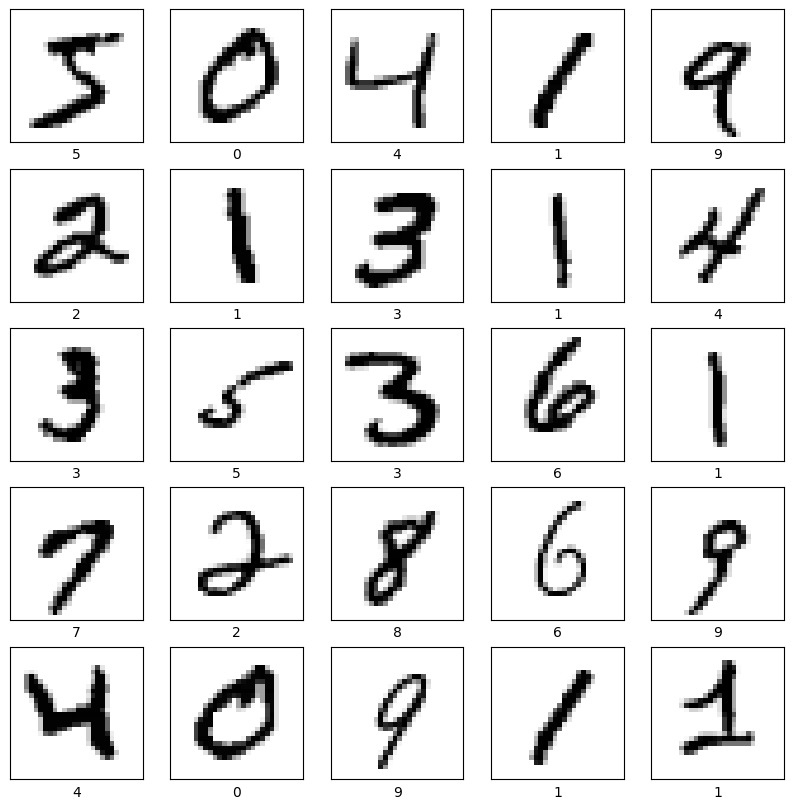

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
network = models.Sequential()

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [7]:
network.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [8]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.4441
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.1162
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0744
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0516
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0375


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.9769 - loss: 0.0713


In [10]:
network.save('my_model.h5')

In [11]:
json_string = network.to_json()

In [12]:
network.save_weights('my_model.weights.h5')

In [13]:
model = load_model('my_model.h5')

In [14]:
import cv2
tst = 255 - cv2.imread('test5.png', 0)
tst = cv2.resize(tst, (28, 28))
tst = tst.reshape((1, 28*28))
tst = tst.astype('float32') / 255

In [15]:
pred=list(model.predict(tst)[0])
print(pred.index(max(pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
5


In [16]:
tst2 = 255 - cv2.imread('my_test.png', 0)
tst2 = cv2.resize(tst2, (28, 28))
tst2 = tst2.reshape((1, 28*28))
tst2 = tst2.astype('float32') / 255

In [17]:
pred=list(model.predict(tst2)[0])
print(pred.index(max(pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4


In [18]:
from keras.datasets import fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


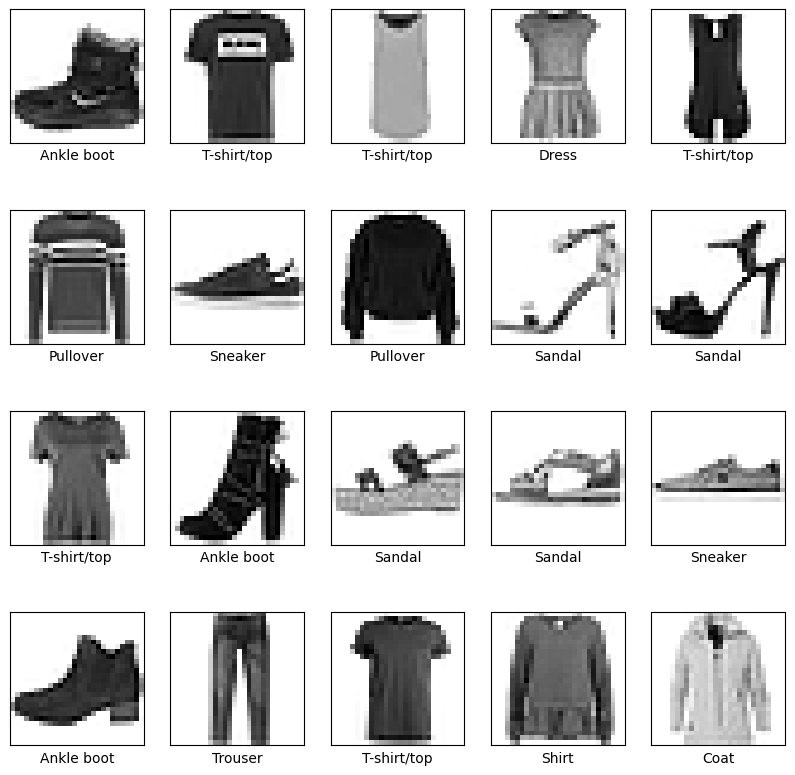

In [19]:
fmnist_classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(fmnist_classes[training_labels[i]])
plt.show()

In [20]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [21]:
fm = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Users/juna/ML/Labs/ML_LAB_5/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
fm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
fm.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7811 - loss: 0.6291
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.3839
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8808 - loss: 0.3342
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8825 - loss: 0.3144
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8906 - loss: 0.2968
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8953 - loss: 0.2811
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9020 - loss: 0.2634
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9040 - loss: 0.2541
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9106 - loss: 0.2402
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9097 - loss: 0.2368


In [24]:
test_loss, test_acc = fm.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8761 - loss: 0.3563


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


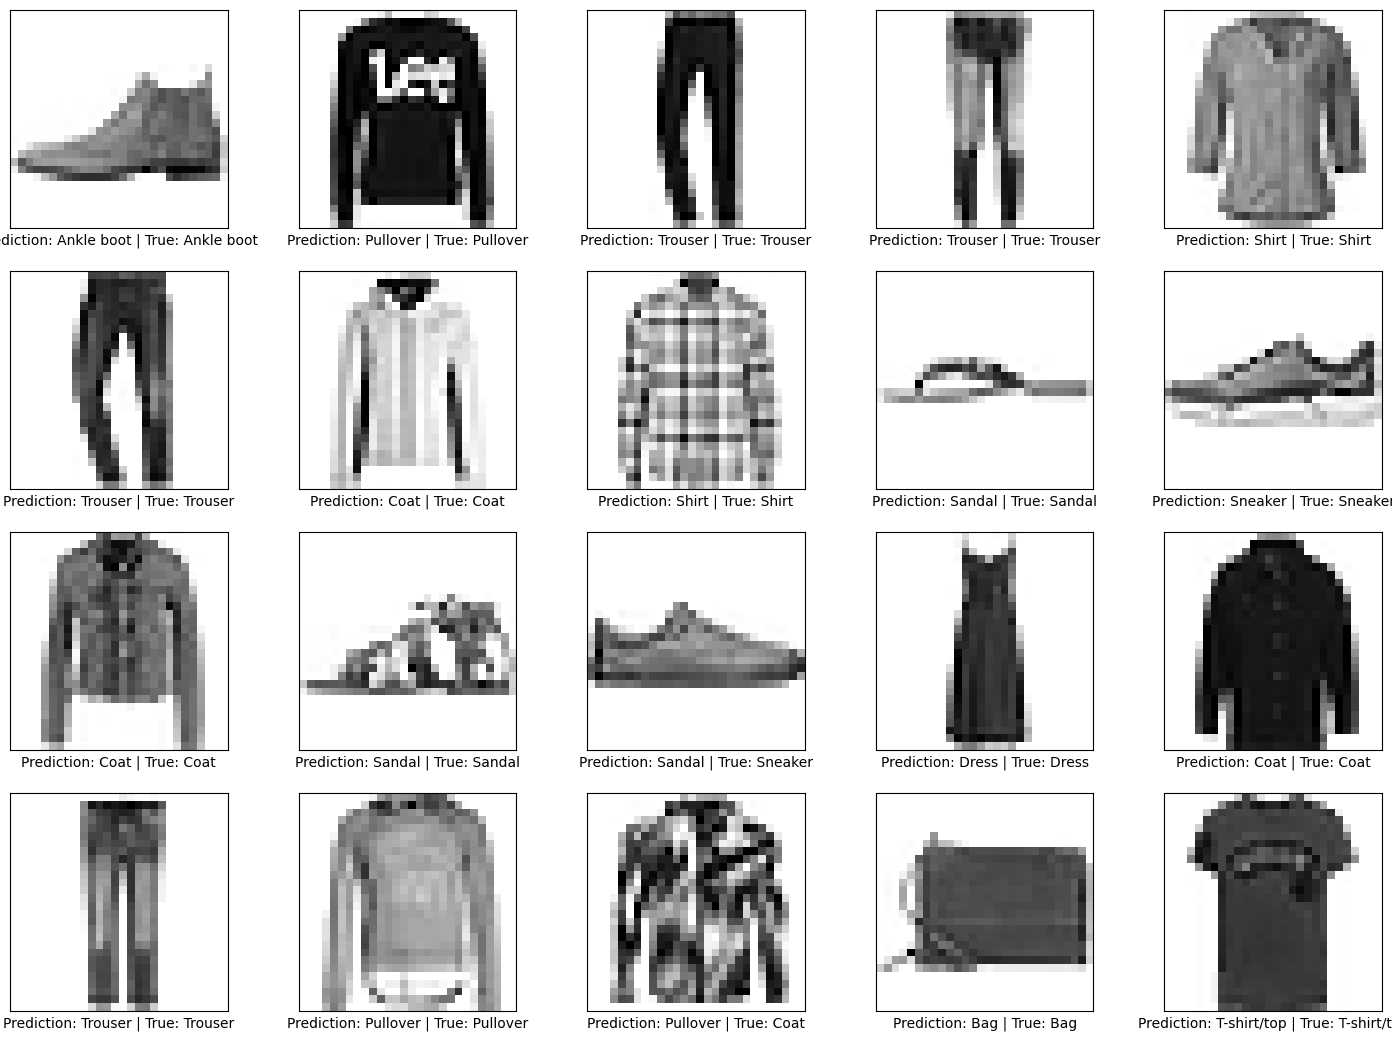

In [25]:
predictions = fm.predict(test_images[:20])
plt.figure(figsize=(18,13))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Prediction: {fmnist_classes[np.argmax(predictions[i])]} | True: {fmnist_classes[test_labels[i]]}")
plt.show()

In [26]:
tst = 255 - cv2.imread('jeans.png', 0)
tst = cv2.resize(tst, (28, 28))
tst = np.expand_dims(tst, axis=0)
tst = tst.astype('float32') / 255

In [27]:
pred=list(fm.predict(tst)[0])
print(fmnist_classes[pred.index(max(pred))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Trouser


In [28]:
from keras.datasets import cifar10
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 59s 0us/step


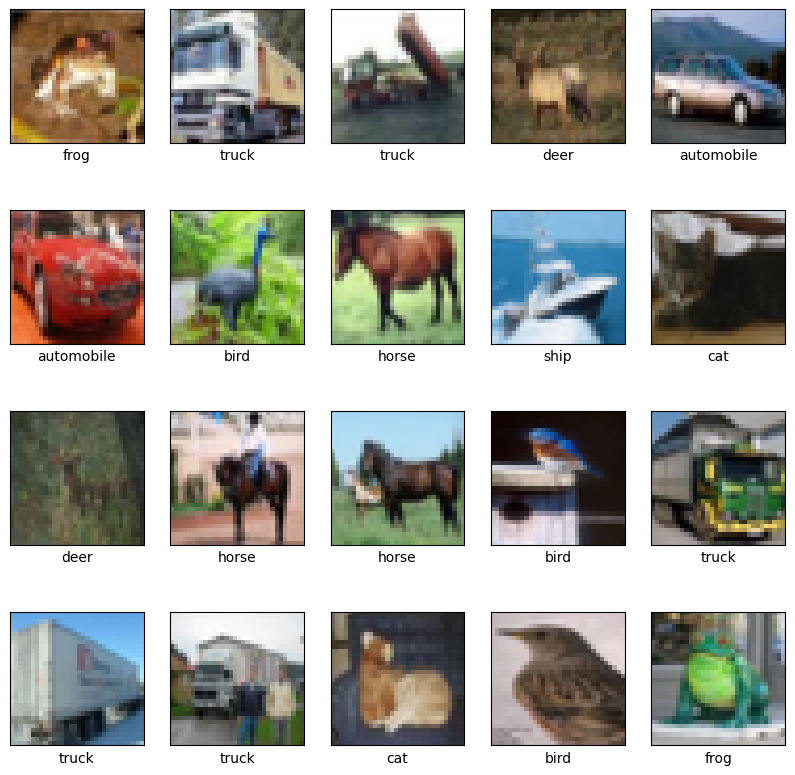

In [29]:
cifar_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i])
    plt.xlabel(cifar_classes[training_labels[i][0]])
plt.show()

In [30]:
training_images, test_images = training_images / 255.0, test_images / 255.0

In [31]:
cif = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])
cif.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/juna/ML/Labs/ML_LAB_5/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
cif.fit(training_images, training_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3044 - loss: 1.8916
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5080 - loss: 1.3743
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5648 - loss: 1.2261
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6053 - loss: 1.1191
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6352 - loss: 1.0424
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6599 - loss: 0.9728
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6789 - loss: 0.9151
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6989 - loss: 0.8602
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7115 - loss: 0.8259
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7254 - loss: 0.7921


In [33]:
test_loss, test_acc = cif.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6889 - loss: 0.9193


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


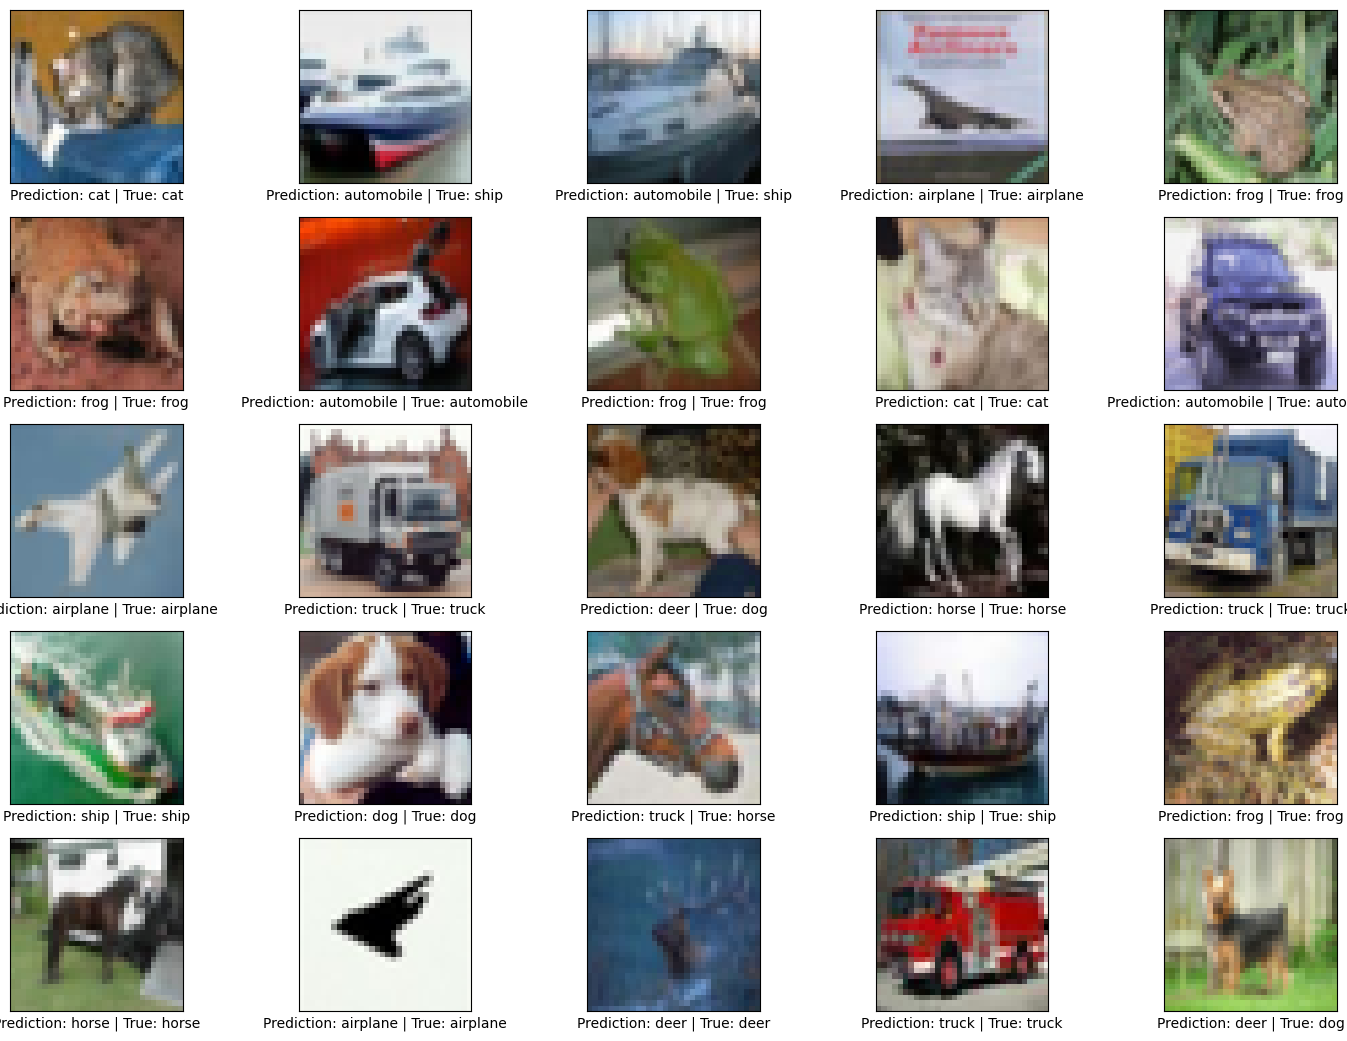

In [34]:
predictions = cif.predict(test_images[:25])
plt.figure(figsize=(18,13))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f"Prediction: {cifar_classes[np.argmax(predictions[i])]} | True: {cifar_classes[test_labels[i][0]]}")
plt.show()

In [35]:
img = cv2.imread('plane.png')
img_resized = cv2.resize(img, (32, 32))
img_normalized = img_resized.astype('float32') / 255.0
input_image = np.expand_dims(img_normalized, axis=0)
predictions = cif.predict(input_image)
predicted_class = np.argmax(predictions)
print(f"Модель думає, що це: {cifar_classes[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Модель думає, що це: airplane
